### Linear Regression:

**Y = wX + b**

Y --> Dependent Variable

X --> Independent Variable

w --> weight

b --> bias

## Gradient Descent:

Gradient Descent is an optimization algorithm used for minimizing the loss function in various machine learning algorithms. It is used for updating the parameters of the learning model.

**w  =  w - α*dw**

**b  =  b - α*db**

## Learning Rate:

Learning rate is a tuning parameter in an optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function.

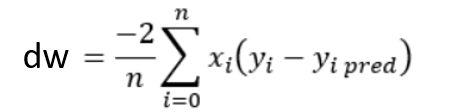

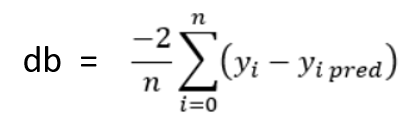

In [25]:
#importing numpy library
import numpy as np

**Linear Regression**

In [26]:
class Linear_Regression():
  
# Initiating the parameters (learning rate and no.of iterations)
    def __init__(self, learning_rate, no_of_iterations):
        
        self.learning_rate = learning_rate
        self.no_of_iterations = no_of_iterations
        
    def fit(self, X, Y ):
        
        # number of training examples and number of features
        self.n, self.m = X.shape # no.of rows and columns
        
        # initiating the weight and bias
        self.w = np.zeros(self.m)
        self.b = 0
        self.X = X
        self.Y = Y
        
        # Implementing Gradient Descent
        for i in range(self.no_of_iterations):
            self.update_weights()
    
    def update_weights(self):
        
        Y_prediction = self.predict(self.X)
        
        # calculate gradients
        
        dw = -(2 * (self.X.T).dot(self.Y - Y_prediction)) / self.n
        
        db = -2 * np.sum(self.Y - Y_prediction)/self.m
        
        # updating the weights
        
        self.w = self.w - self.learning_rate*dw
        self.b = self.b - self.learning_rate*db
    
    def predict(self, X):
        
        return X.dot(self.w) + self.b

**Using Linear Regression model for Prediction**

In [27]:
# importing the dependencies
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


**Data Pre-Processing**

In [28]:
# loading the data from csv file to a pandas DataFrame
salary_data = pd.read_csv('salary_data.csv')

In [29]:
# printig the first 5 records of the dataframe
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [30]:
# printig the last 5 records of the dataframe
salary_data.tail()

,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [31]:
# number of rows & columns in the dataframe
salary_data.shape

(30, 2)

In [32]:
 # checking for missing values
salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

**Splitting the feature and target**

In [33]:
X = salary_data.iloc[:,:-1].values
Y = salary_data.iloc[:,1].values

In [34]:
print(X)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [35]:
print(Y)

[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


**Splitting the dataset into training and test data**

In [36]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.33, random_state = 2)

**Training the Linear Regression Model**

In [42]:
model = Linear_Regression(learning_rate = 0.01,no_of_iterations = 1000)

In [44]:
model.fit(X_train,Y_train)

In [45]:
# printing the parameter values (weights and bias)
print("Weight = ", model.w[0])
print("Bias = ", model.b)

Weight =  9512.944987627396
Bias =  23707.81324657552


Thus,Y = 9512(X) + 23707

salary = 9512(experience) + 23707

Predict the salary value for test data

In [46]:
test_data_prediction = model.predict(X_test)

In [47]:
print(test_data_prediction)

[ 36074.64173049  34172.05273297  66516.0656909   58905.7097008
  91249.72265873  80785.48317234 101713.96214512  52246.64820946
  42733.70322183  88395.83916244]


Visualizing the predicted values and actual values

Text(0.5, 1.0, 'Salary vs Work Experience')

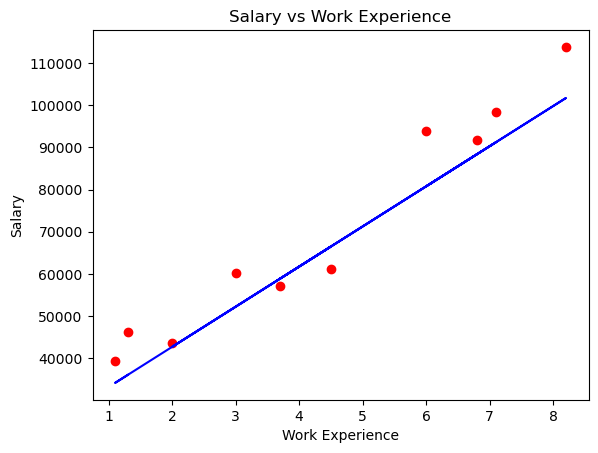

In [50]:
plt.scatter(X_test,Y_test, color = 'red')
plt.plot(X_test, test_data_prediction, color = 'blue')
plt.xlabel('Work Experience')
plt.ylabel('Salary')
plt.title('Salary vs Work Experience')